TEAM 16 PROJECT 1

POST ELECTION SOCIAL MEDIA ANALYTICS

Questions A:

The following code was used to scrape twitter.

In [ ]:
from twython import TwythonStreamer, TwythonError
import sys
import json
from time import sleep
import time

tweets = []

class MyStreamer(TwythonStreamer):
    '''our own subclass of TwythonStremer'''

    # overriding
    def on_success(self, data):
        try:
            if data['lang'] == 'en':
                tweets.append(data['text'])
                print 'received tweet #', len(tweets), data['text'][:100]
                
        except:
            pass
        
        if len(tweets) % 500 == 0:
            self.store_json()
            sleep(30)
            #self.disconnect()
        
            if len(tweets) == 10000:
                self.disconnect()

    # overriding
    def on_error(self, status_code, data):
        print status_code, data
        self.disconnect()

    def store_json(self):
        t=time.localtime()
        timestamp = time.strftime('%b_%d_%Y_%H%M%S',t)
        with open('tweet_stream_{}_{}_{}.json'.format(keyword, len(tweets), timestamp), 'w') as f:
            json.dump(tweets, f, indent=4)


if __name__ == '__main__':

    #with open('gene_twitter_credentials.json', 'r') as f:
    #    credentials = json.load(f)

    # create your own app to get consumer key and secret
    CONSUMER_KEY = credentials['CONSUMER_KEY']
    CONSUMER_SECRET = credentials['CONSUMER_SECRET']
    ACCESS_TOKEN = credentials['ACCESS_TOKEN']
    ACCESS_TOKEN_SECRET = credentials['ACCESS_TOKEN_SECRET']
  

    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET,retry_in=10)

    if len(sys.argv) > 1:
        keyword = sys.argv[1]
    else:
        keyword = 'Obama'

    stream.statuses.filter(track=keyword)


Questions A: Part 2

Once we had the data pullled, we used this code to combine the files of data.

In [ ]:


import os
#print(os.listdir('/Users/Carter/Desktop/PythonHMWK/Preproject/Hillary Tweets'))
print(os.listdir('/users/shannonlamberson/dropbox/00_public1/ProjectTwitterAnalysis/ObamaTwitterScrape2'))

In [ ]:
def merge(s):
    return s.strip()[1:-1]
def cat_json(output_filename, input_filenames):
    with file(output_filename, "w") as outfile:
        first = True
        for infile_name in input_filenames:
            with file(infile_name) as infile:
                if first:
                    outfile.write('[')
                    first = False
                else:
                    outfile.write(',')
                outfile.write(merge(infile.read()))
        outfile.write(']')
cat_json('mastermerge.json', [ 'tweet_stream_Obama_500_Nov_15_2016_180206.json', 
'tweet_stream_Obama_500_Nov_15_2016_180436.json', 'tweet_stream_Obama_500_Nov_15_2016_180629.json', 
'tweet_stream_Obama_500_Nov_15_2016_180659.json', 'tweet_stream_Obama_500_Nov_15_2016_181150.json', 
'tweet_stream_Obama_500_Nov_15_2016_181807.json', 'tweet_stream_Obama_500_Nov_15_2016_181942.json',
 'tweet_stream_Obama_500_Nov_15_2016_182203.json', 'tweet_stream_Obama_500_Nov_15_2016_182717.json',
 'tweet_stream_Obama_500_Nov_15_2016_182914.json', 'tweet_stream_Obama_500_Nov_15_2016_183524.json', 
 'tweet_stream_Obama_500_Nov_15_2016_183708.json', 'tweet_stream_Obama_500_Nov_15_2016_183920.json',
 'tweet_stream_Obama_500_Nov_15_2016_184137.json'])

We then found a better way to stream the tweets. This code kept the streaming open and closed when it hit 10,000.

In [ ]:
from twython import TwythonStreamer, TwythonError, TwythonRateLimitError, TwythonAuthError
from unidecode import unidecode
import sys
import json
from time import sleep
import time


tweets = []
blank = []

class MyStreamer(TwythonStreamer):
    '''our own subclass of TwythonStremer'''

    # overriding
    def on_success(self, data):
        try:
            if data['lang'] == 'en':
                tweets.append(unidecode(data['text']))
                print 'received tweet #', len(tweets), unidecode(data['text'])[:100]
                
        except:
            print 'Error encountered'
        
#==============================================================================
        if len(tweets) % 10 == 0:
            self.store_json()
            #sleep(30)
            #self.disconnect()

#==============================================================================
        
#==============================================================================
        if len(tweets) >= 1000:
            self.store_json()
            self.disconnect()
            return False

#==============================================================================
    # overriding
    def on_error(self, status_code, data):
        print status_code, data
        #self.disconnect()


#==============================================================================
    def store_json(self):
        t=time.localtime()
        timestamp = time.strftime('%b_%d_%Y',t)
        #with open('tweet_stream_{}_{}.json'.format('Airlines', timestamp), 'w') as f:
        with open('tweet_stream_{}_{}.json'.format(keyword, timestamp), 'w') as f:    
            json.dump(tweets, f, indent=4)
  
#==============================================================================

if __name__ == '__main__':

    CONSUMER_KEY = 'CONSUMER_KEY'
    CONSUMER_SECRET = 'CONSUMER_SECRET'
    ACCESS_TOKEN = 'ACCESS_TOKEN'
    ACCESS_TOKEN_SECRET = 'ACCES_TOKEN_SECRET'

    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

#==============================================================================
    if len(sys.argv) > 1:
        keyword = sys.argv[1]
    else:
        keyword = 'Hillary'
#==============================================================================

        
#    stream.statuses.filter(track=keyword)
#import sys #Do this if you want to log error output
    timeout = time.time() + 60 * 1 #minutes from now
    test = -1
    while True:  #Endless loop: personalize to suit your own purposes
        
        if test == 0 or time.time() > timeout:
            stream.store_json()
            break
        
        test = test - 1
        
        try: 
            stream.statuses.filter(track=keyword)
        except:
            e = sys.exc_info()[0]  #Get exception info (optional)
            print 'ERROR:',e  #Print exception info (optional)
            continue

Question B:

Here is the code we used to get sentiment analysis.

In [ ]:
from textblob import TextBlob
import string
# open a text file
f = open('/Users/shannonlamberson/Dropbox/00_public1/ProjectTwitterAnalysis/ObamaTwitterScrape2/mastermerge.json')
lines = f.read().split(',')
f.close()

p= string.punctuation
d= string.digits

table_p = string.maketrans(p, len(p) * " ")
table_d = string.maketrans(d, len(d) * " ")

obamatweets = []
for ln in lines:
    line=ln.lstrip()
    line=line.translate(table_p)
    line=line.translate(table_d)
    words = line.strip().split()
    for word in words:
         if len(word)>8:
             obamatweets.append(word)
    else:
        pass
#print(obamatweets)
tb=TextBlob(str(obamatweets))
print tb.sentiment


Question C:
Here is the code we used to get the Word Cloud.

In [ ]:
#pip install WordCloud

import matplotlib.pyplot as plt
#from os import path
from wordcloud import WordCloud

#d = path.dirname(__file__)

# Read the whole text.

import string
# open a text file
f = open('/Users/shannonlamberson/Dropbox/00_public1/ProjectTwitterAnalysis/tweet_stream_Obama_Nov_19_2016v1.json')
lines = f.read().split(',')
f.close()


p= string.punctuation
d= string.digits

table_p = string.maketrans(p, len(p) * " ")
table_d = string.maketrans(d, len(d) * " ")


obamatweets=""

for ln in lines:
    line=ln.lstrip()
    line=line.translate(table_p)
    line=line.translate(table_d)
    
    words = line.strip().split()
    for word in words:

         if len(word)>8:
             obamatweets += " "+word
    else:
        pass

# Generate a word cloud image
wordcloud = WordCloud().generate(obamatweets)

wordcloud = WordCloud(max_font_size=70).generate(obamatweets)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Question B: Sentiment Analysis for 10,000 tweets about Hillary, Trump and Obama

Both Hillary and Obama had positive polarity results, while Trumps dipped into the negative. Obama tweets were the most polar coming in at 18%. Hillary came in at a 4% and Trump at -2%. This means that there were more contradictory tweets about Obama. 


Subjectivity:
The tweets about each person were very close on the subjectivity scale. With emotions high in the recent election, it doesn't surprise me that the subjectivity ranged from about 60%-68%.


Obama
Sentiment(polarity=0.1831443914081148, subjectivity=0.62448573701557)

Hillary
Sentiment(polarity=0.04392839347996294, subjectivity=0.5977026834650147)

Trump
Sentiment(polarity=-0.023103420008008576, subjectivity=0.6769499255296778)


Definition of Polarity and Subjectivity:
- Polarity is a float that ranges between -1.0 and 1.0
- the higher the number the more contradictory
    polarity means having two opposit or contradictory tendences or opinions, in our case.
- Subjectivity is a float within a range of 0.0 and 1.0
- the higher the more emotional
    0.0 is objective
    1.0 is very subjective




Obama's word cloud

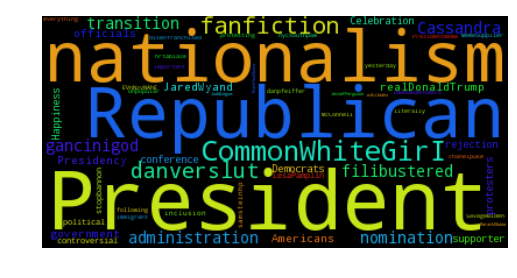

Hillary's Word Cloud

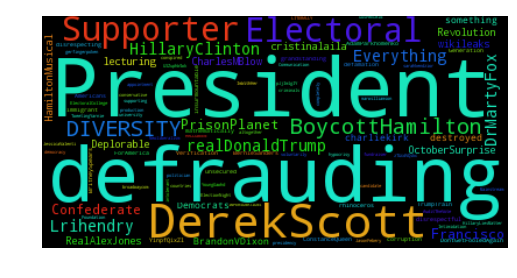

Trump's Word Cloud

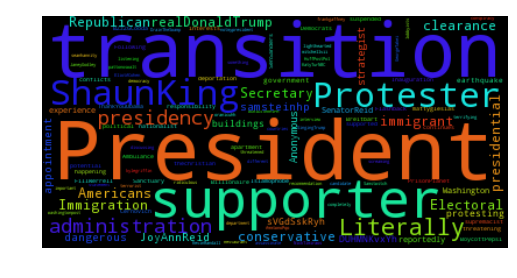

Question D:

We collected 1,000 tweets from the following 7 cities: Dallas, New York, San Fransico, Los Angeles, Chicago, Washington, Atlanta.

We used those tweets to analyze what was said about each candidate.

(We used the same streaming code as above with an added section to pull from a certain longitude and latitude rectangle. I've included the geo-targeted streaming code below.)


In [ ]:
from twython import TwythonStreamer, TwythonError, TwythonRateLimitError, TwythonAuthError
from unidecode import unidecode
import sys
import json
from time import sleep
import time


tweets = []
blank = []

class MyStreamer(TwythonStreamer):
    '''our own subclass of TwythonStremer'''

    # overriding
    def on_success(self, data):
        try:
            if data['lang'] == 'en':
                tweets.append(unidecode(data['text']))
                print 'received tweet #', len(tweets), unidecode(data['text'])[:100]
                
        except:
            print 'Error encountered'
        
#==============================================================================
        if len(tweets) % 10 == 0:
            self.store_json()
            #sleep(30)
            #self.disconnect()

#==============================================================================
        
#==============================================================================
        if len(tweets) >= 1000:
            self.store_json()
            self.disconnect()
            return False
# 
#==============================================================================
    # overriding
    def on_error(self, status_code, data):
        print status_code, data
        #self.disconnect()


#==============================================================================
    def store_json(self):
        t=time.localtime()
        timestamp = time.strftime('%b_%d_%Y',t)
        #with open('tweet_stream_{}_{}.json'.format('Airlines', timestamp), 'w') as f:
        with open('tweet_stream_{}_{}.json'.format(keyword, timestamp), 'w') as f:    
            json.dump(tweets, f, indent=4)
  
#==============================================================================

if __name__ == '__main__':

    CONSUMER_KEY = 'Cr8f9cmHlS6I3Cb1Zb3ynyjtq'
    CONSUMER_SECRET = 'sTV6tjjdCR50bzJVyedG0xr3hREndCUQGA36qR3QMfWet1FUBm'
    ACCESS_TOKEN = '73247538-uxVkeu23KBdCMhmlSLW7mNcfFQN5qUuyypr9uA4cV'
    ACCESS_TOKEN_SECRET = 'RWn2QboscAe2QILQl7In8wjogCafGxoScyqnG5ieCRpzj'

    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

#==============================================================================
    if len(sys.argv) > 1:
        keyword = sys.argv[1]
    else:
        #keyword = 'Alaska Airlines, Allegiant Air, American Airlines, Delta Airlines, Frontier Airlines, Jetblue Airlines, Southwest Airlines, Spirit Airlines, Sun Country Airlines, United Airlines, Virgin Airlines'
        keyword = 'Obama'
#==============================================================================

        
   # stream.statuses.filter(track=keyword, locations="-122.26,37.46, -122.24,37.47",)
#import sys #Do this if you want to log error output
    timeout = time.time() + 60 * 1 #minutes from now
    test = -1
    while True:  #Endless loop: personalize to suit your own purposes
        
        if test == 0 or time.time() > timeout:
            stream.store_json()
            break
        
        test = test - 1
        
        try: 
            stream.statuses.filter(locations="-122.26,37.46, -122.24,37.47")
        except:
            e = sys.exc_info()[0]  #Get exception info (optional)
            print 'ERROR:',e  #Print exception info (optional)
            continue


The following are results from our city analysis. I didn't include the code for each seperate run, because we just changed the file name from the code given above. 

SAN FRANSICO ANALYSIS

Looks like San Fransico has a more contradictory tweets on Trump with a polarity score
coming in at 33%. Both Hillary and Obama tweets had negetavie polarity scores at
-25%. The Tweets about Trump were the most objective of the three.


Hillary - Sentiment(polarity=-0.25, subjectivity=1.0)

Trump - Sentiment(polarity=0.3333333333333333, subjectivity=0.5)

Obama - Sentiment(polarity=-0.25, subjectivity=1.0)



San Fransico: Hillary

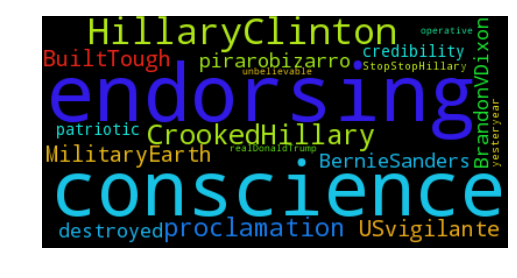

San Fransico: Trump

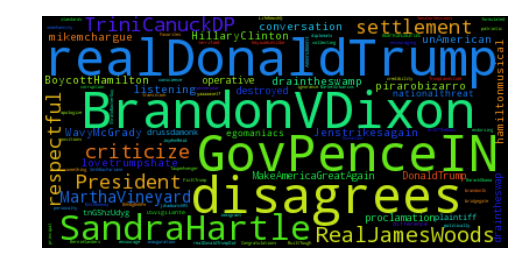

San Fransico: Obama

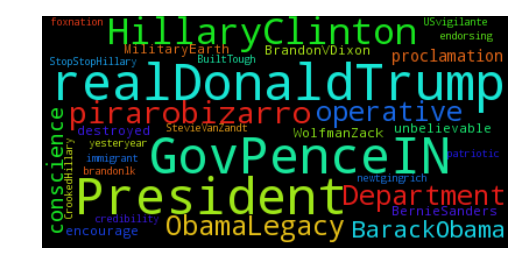

DALLAS ANALYSIS

The tweets that we pulled from Dallas didn't mention Obama at all, and the Hillary tweets were minimal. Texan's from Dallas were talking about Trump. Their polarity was postivie meaning contradictory opinions. The subjectivity was farily high at 56%.

Hillary - Sentiment(polarity=0.0, subjectivity=0.0)

Trump - Sentiment(polarity=0.26666666666666666, subjectivity=0.5666666666666667)

Obama - no tweets with Obama


Hillary: Dallas

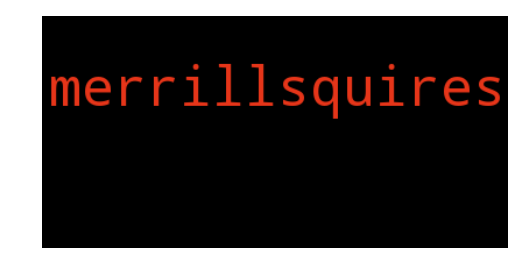

Obama: Dallas

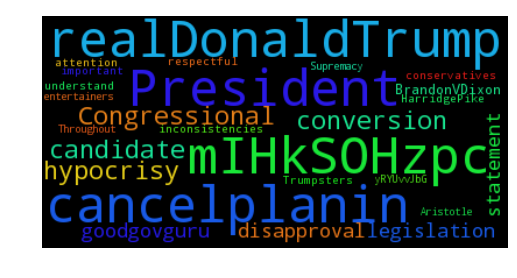

LOS ANGELES ANALYSIS:

Los Angeles really doesn't have much to say about Hillary. Obama came in at a higher polarity than Trump, but Trump tweets were more subjective, by about 15%.


Obama: Sentiment(polarity=0.5, subjectivity=0.7)

Hillary: Sentiment(polarity=0.0, subjectivity=0.0)

Trump: Sentiment(polarity=0.13095238095238096, subjectivity=0.8571428571428571)


Trump: Los Angeles

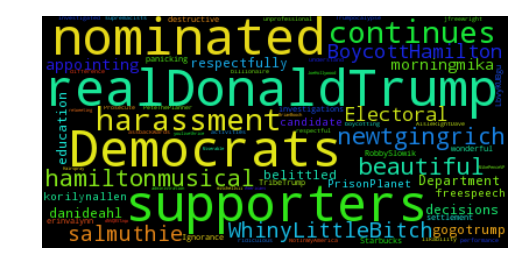

Obama: Los Angeles

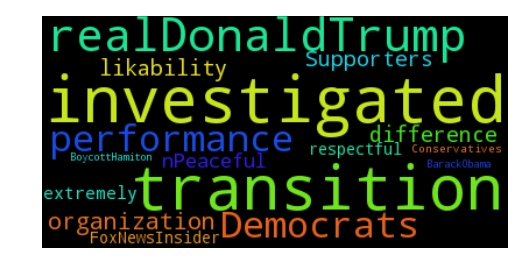

Hillary: Los Angeles

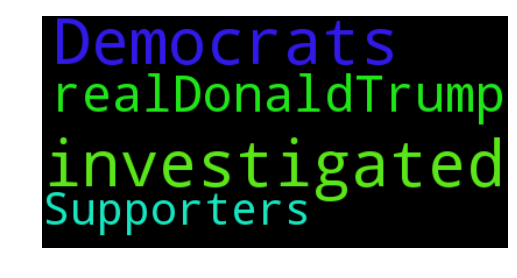

NEW YORK CITY

The polarity was highest in Trump tweets, but Obama and Hilary were more subjective. 

Obama - Sentiment(polarity=0.125, subjectivity=0.75)

Hillary - Sentiment(polarity=0.125, subjectivity=0.75)

Trump - Sentiment(polarity=0.20476190476190478, subjectivity=0.5238095238095238)



Hillary: New York City

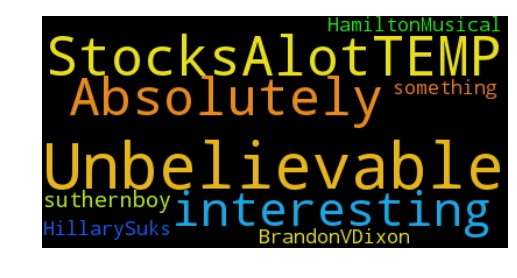

Obama: New York City

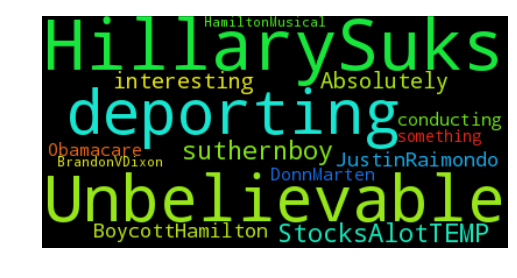

Trump: New York City

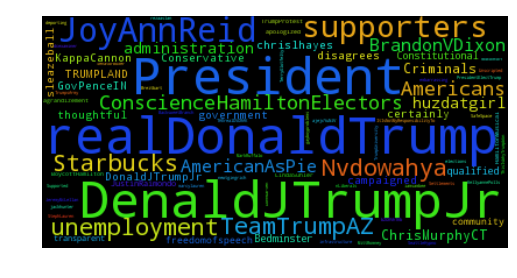

ATLANTA ANALYSIS

The tweets from Atlana show Obama and Hillary at 0 for polarity and subjectivity. Trump tweet polarity score was 25% and subjectivity was 53%. 

Obama - Sentiment(polarity=0.0, subjectivity=0.0)

Hillary - Sentiment(polarity=0.0, subjectivity=0.0)

Trump - Sentiment(polarity=0.25, subjectivity=0.5333333333333333)


Trump: Atlanta

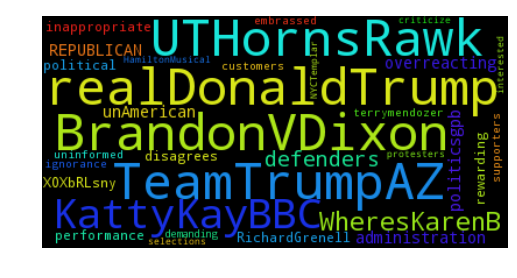

Hillary: Atlanta

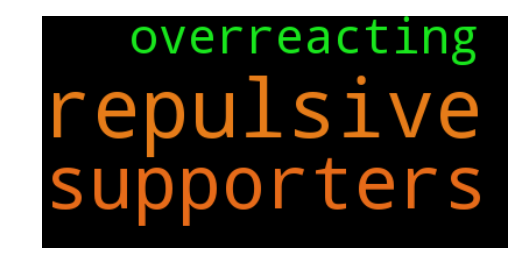

Obama: Atlanta

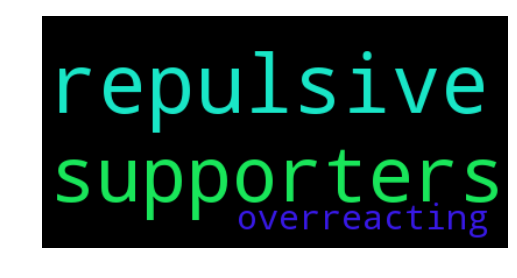

CHICAGO

Chicago tweets mentioned Obama and and Trump. Obama's polarity score in Chiago was high 85%, meaning many contradictory tweets here. Obama also had the highest subjectivity score, meaning more emotional words.


Obama - Sentiment(polarity=0.85, subjectivity=1.0)

Hillary - Sentiment(polarity=0.0, subjectivity=0.0)

Trump - Sentiment(polarity=-0.04999999999999999, subjectivity=0.725)

Obama: Chicago

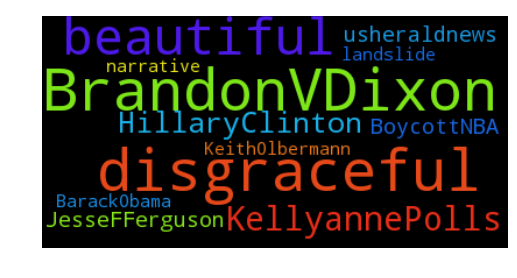

Hillary: Chicago

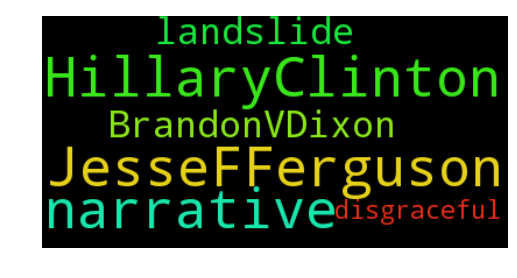

Trump: Chicago

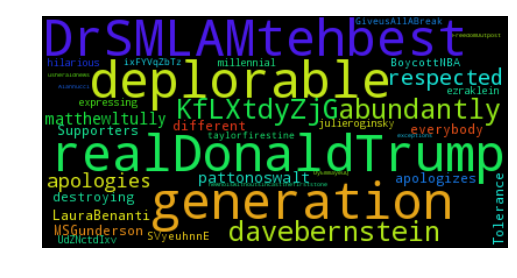

District of Columbia

The District of Columbia's tweets mentioned Trump more than Hillary and Obama. Trump tweets had a polarity score of 25% and came in at a 50% subjectivity score.

Obama - Sentiment(polarity=0.0, subjectivity=0.0)

Hillary - Sentiment(polarity=0.0, subjectivity=0.0)

Trump - Sentiment(polarity=0.25, subjectivity=0.5)

Trump: District of Columbia

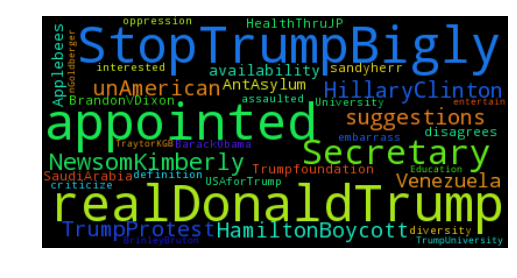

Hillary: District of Columbia

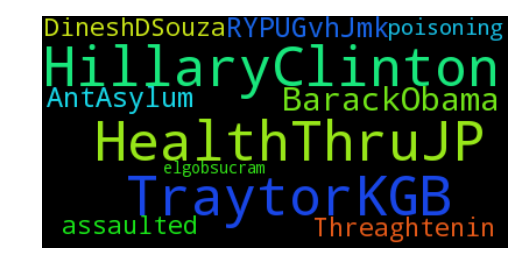

Obama: District of Columbia

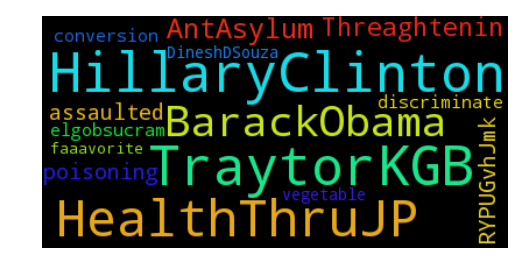